In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def l1norm(im):
    return mean(abs(im))

def tvfunc(im):
    grad_x = concatenate((im[1:, :] - im[:-1, :], zeros((1, im.shape[1]))), axis=0)
    grad_y = concatenate((im[:, 1:] - im[:, :-1], zeros((im.shape[0], 1))), axis=1)
    return mean(sqrt(grad_x**2 + grad_y**2))

In [3]:
import glob
import os
import pydicom

In [4]:
# Point this to the location in which you have saved the FastMRI (brain_fastMRI_DICOM) dataset
%cd ........

In [5]:
import pandas as pd

def get_metadata(file):
    with open(file, 'rb') as in_file:
        dicom = pydicom.dcmread(in_file)
    im = dicom.pixel_array.astype(float32)
    im = im / im.max()
    l1 = l1norm(im)
    tv = tvfunc(im)
    outlier_num = tv / l1
    match = re.match('(.*)/(.*).dcm', file)
    folder, file_no = match.group(1), match.group(2)
    return pd.DataFrame({'folder': folder,
                         'file': file_no, 
                         'data_repr': dicom.file_meta[(0x2, 0x10)].repval,
                         'series_descr': dicom.SeriesDescription,
                         'sampling_rate': float(dicom.PercentSampling),
                         'rows': int(dicom.Rows),
                         'columns': int(dicom.Columns),
                         'l1': l1,
                         'tv': tv,
                         'outlier_num': outlier_num}, index=[1])

The cell below will take a while to run

In [6]:
from tqdm.notebook import tqdm
metadata = pd.concat((get_metadata(item) for item in tqdm(glob.glob('**/*.dcm'))), ignore_index=True)
metadata.to_csv('fastmri_metadata.csv')

In [6]:
metadata = pd.read_csv('fastmri_metadata.csv').drop(columns='Unnamed: 0')

In [7]:
metadata

,folder,file,data_repr,series_descr,sampling_rate,rows,columns,l1,tv,outlier_num
0,446005329771,219,JPEG 2000 Image Compression (Lossless Only),AX T2,100.000000,320,320,0.077979,0.011900,0.152608
1,446005329771,221,JPEG 2000 Image Compression (Lossless Only),AX T2,100.000000,320,320,0.058543,0.009485,0.162021
2,446005329771,334,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,81.000000,320,270,0.113437,0.013549,0.119441
3,446005329771,237,JPEG 2000 Image Compression (Lossless Only),AX T2,100.000000,320,320,0.125470,0.027609,0.220045
4,446005329771,216,JPEG 2000 Image Compression (Lossless Only),AX T2,100.000000,320,320,0.121941,0.026798,0.219763
...,...,...,...,...,...,...,...,...,...,...
370324,336398770572,269,Explicit VR Little Endian,AX T1+G,69.921875,256,256,0.142485,0.031932,0.224109
370325,336398770572,318,Explicit VR Little Endian,AX T1+G,69.921875,256,256,0.143440,0.031804,0.221720
370326,336398770572,271,Explicit VR Little Endian,AX T1+G,69.921875,256,256,0.144156,0.030241,0.209781
370327,336398770572,81,Explicit VR Little Endian,AX T2,100.000000,384,312,0.094419,0.037620,0.398435


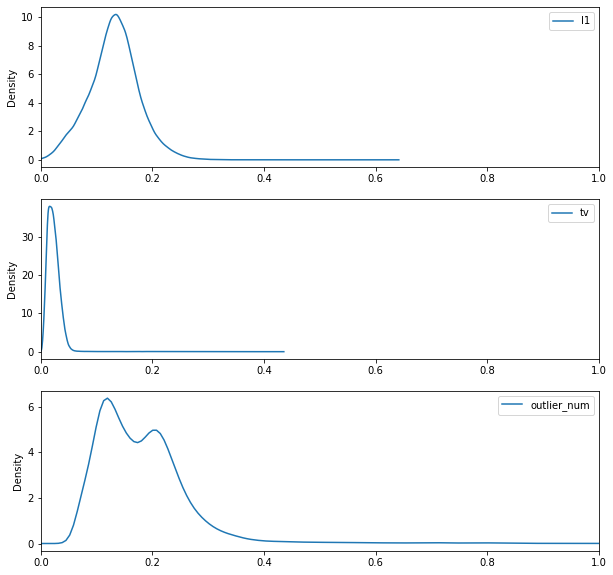

In [8]:
rcParams['figure.figsize'] = (10, 10)
stats = ['l1', 'tv', 'outlier_num']
fig, ax = subplots(3, 1)
for i, stat in enumerate(stats):
    metadata[[stat]].plot.kde(ax=ax[i], xlim=(0, 1))

In [9]:
t1_subselection = metadata[metadata['series_descr'].str.contains('T1')].query('rows==320 & columns==320')

In [10]:
t1_subselection

,folder,file,data_repr,series_descr,sampling_rate,rows,columns,l1,tv,outlier_num
260,875364437273,2229,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.139873,0.019080,0.136412
261,875364437273,2228,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.146975,0.021737,0.147896
264,875364437273,2226,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.137783,0.020927,0.151884
269,875364437273,2237,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.152788,0.022790,0.149159
271,875364437273,2234,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.079909,0.008528,0.106720
...,...,...,...,...,...,...,...,...,...,...
370242,349848930374,581,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.087269,0.010833,0.124134
370243,349848930374,576,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.158858,0.024324,0.153119
370244,349848930374,604,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.060449,0.007598,0.125690
370245,349848930374,598,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.158022,0.022322,0.141257


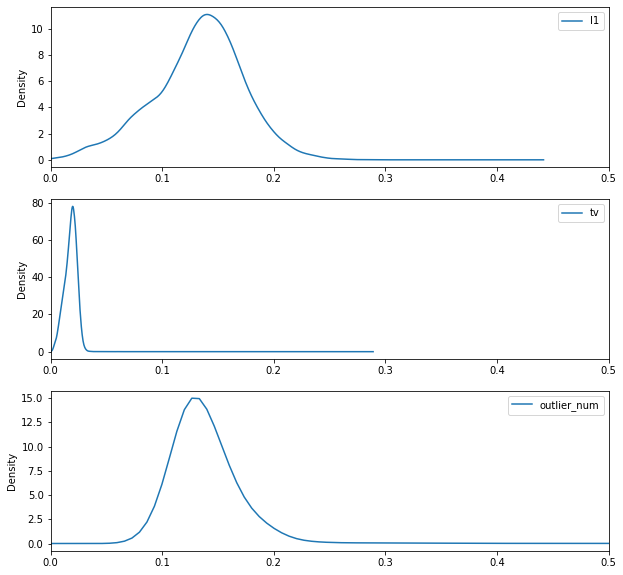

In [11]:
rcParams['figure.figsize'] = (10, 10)
stats = ['l1', 'tv', 'outlier_num']
fig, ax = subplots(3, 1)
for i, stat in enumerate(stats):
    t1_subselection[[stat]].plot.kde(ax=ax[i], xlim=(0, 0.5))

In [12]:
selection = t1_subselection.query('l1 > 0.13 & outlier_num < 0.15').reset_index().drop(columns='index')
selection

,folder,file,data_repr,series_descr,sampling_rate,rows,columns,l1,tv,outlier_num
0,875364437273,2229,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.139873,0.019080,0.136412
1,875364437273,2228,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.146975,0.021737,0.147896
2,875364437273,2237,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.152788,0.022790,0.149159
3,875364437273,2232,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.139226,0.016528,0.118712
4,875364437273,2231,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.152875,0.018370,0.120163
...,...,...,...,...,...,...,...,...,...,...
21998,349848930374,616,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.159403,0.021287,0.133539
21999,349848930374,412,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.156224,0.023263,0.148907
22000,349848930374,579,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.134073,0.016563,0.123535
22001,349848930374,598,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.158022,0.022322,0.141257


/nfs/st01/hpc-cmih-cbs31/fs436/miniconda3/envs/dl/lib/python3.8/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value doesn't match the sample bit depth of the JPEG2000 pixel data (12 vs 16 bit). It's recommended that you first change the 'Bits Stored' value to match the JPEG2000 bit depth in order to get the correct pixel data
  warnings.warn(


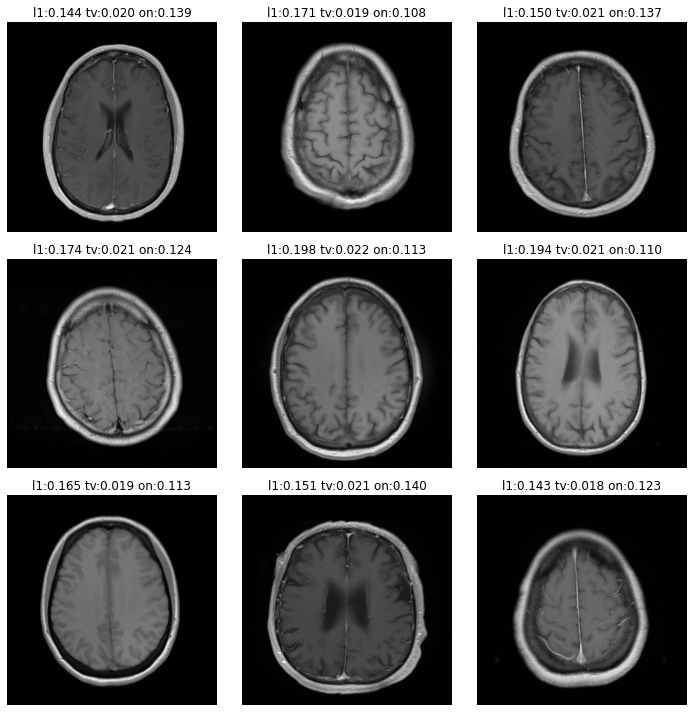

In [13]:
samp = selection.sample(9).reset_index().drop(columns='index')
for i, row in samp.iterrows():
    subplot(3, 3, i + 1)
    dcm = pydicom.dcmread(os.path.join(f"{samp.iloc[i]['folder']}", f"{samp.iloc[i]['file']}.dcm"))
    im = dcm.pixel_array
    imshow(im, cmap='gray')
    title(f"l1:{samp.iloc[i]['l1']:.3f} tv:{samp.iloc[i]['tv']:.3f} on:{samp.iloc[i]['outlier_num']:.3f}")
    axis('off')
tight_layout()

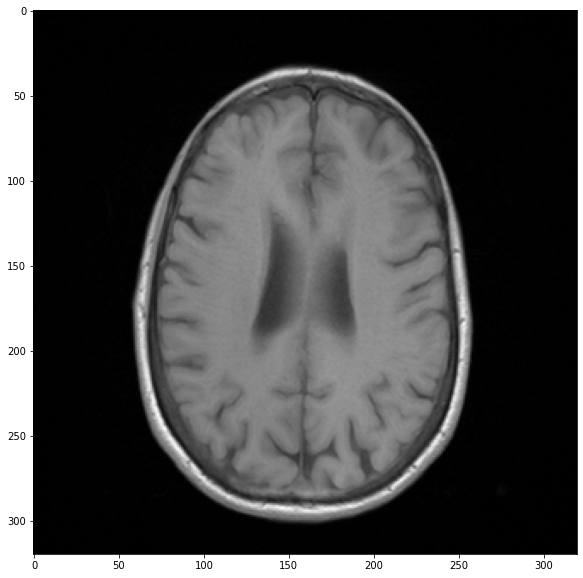

In [14]:
k = 5
imshow(pydicom.dcmread(os.path.join(f"{samp.iloc[k]['folder']}", f"{samp.iloc[k]['file']}.dcm")).pixel_array, cmap='gray')

In [15]:
with open('selected_ims.txt', 'w') as out_file:
    out_file.writelines(selection['folder'].apply(str) + '/' + selection['file'].apply(str) + '.dcm\n')

In [16]:
selection

,folder,file,data_repr,series_descr,sampling_rate,rows,columns,l1,tv,outlier_num
0,875364437273,2229,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.139873,0.019080,0.136412
1,875364437273,2228,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.146975,0.021737,0.147896
2,875364437273,2237,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.152788,0.022790,0.149159
3,875364437273,2232,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.139226,0.016528,0.118712
4,875364437273,2231,JPEG 2000 Image Compression (Lossless Only),AX T1 POST,80.0,320,320,0.152875,0.018370,0.120163
...,...,...,...,...,...,...,...,...,...,...
21998,349848930374,616,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.159403,0.021287,0.133539
21999,349848930374,412,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.156224,0.023263,0.148907
22000,349848930374,579,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.134073,0.016563,0.123535
22001,349848930374,598,Explicit VR Little Endian,AX T1 POST,80.0,320,320,0.158022,0.022322,0.141257


In [340]:
from tqdm.notebook import tqdm
selected_ims = memmap('selected_ims.dat', dtype=float32, shape=(22003, 2, 320, 320), mode='w+')
for i, row in tqdm(selection.iterrows()):
    dicom = pydicom.dcmread(str(row['folder']) + '/' + str(row['file']) + '.dcm')
    im = dicom.pixel_array.astype(float32)
    im = im * int(dicom[(0x28, 0x107)].repval) / (4096 * im.max())
    selected_ims[i, 0, ...] = im

/nfs/st01/hpc-cmih-cbs31/fs436/miniconda3/envs/dl/lib/python3.8/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value doesn't match the sample bit depth of the JPEG2000 pixel data (12 vs 16 bit). It's recommended that you first change the 'Bits Stored' value to match the JPEG2000 bit depth in order to get the correct pixel data
  warnings.warn(


In [18]:
from equivariant_ip.utils.datasets import DatasetFromMemmap

In [50]:
import torch
from tqdm.notebook import tqdm
from equivariant_ip.mri.forward_operators import SingleCoilMRIForwardOperator
forward_op = SingleCoilMRIForwardOperator(mask=torch.ones(320, 320, device=0))

full_dataset = DatasetFromMemmap('selected_ims.dat', shape=(22003, 2, 320, 320))
loader = torch.utils.data.DataLoader(full_dataset, batch_size=500)

kspace = memmap('measurements.dat', shape=(22003, 2, 320, 320), dtype=float32, mode='w+')

for i, x in tqdm(enumerate(loader)):
    y = forward_op.simulate_kspace(x, noise_level=0.03)
    kspace[500 * i:500 * i + x.shape[0], ...] = y.cpu()